In [50]:
'''
import les packages 
'''

%matplotlib inline
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics


In [51]:
'''
import the data et nettoyage des données

'''
dataset = pd.read_csv( "StudentsPerformance.csv")
dataset.head()
# le niveau de l'éducation est entre 1 et 6
dataset['parental level of education'] = dataset['parental level of education'].map(lambda x: x.replace("master's degree",'6').replace("some high school",'3').replace("high school",'2').replace("associate's degree",'4').replace("bachelor's degree",'5').replace('some college','1'))
#utiliser 1 pour lunch standard, et 0 pour free/reduced
dataset['lunch'] = dataset['lunch'].map(lambda x: x.replace("standard",'1').replace("free/reduced",'0'))
# remplacer completed avec 1, none avec 0 
dataset['test preparation course'] = dataset['test preparation course'].map(lambda x: x.replace("completed",'1').replace("none",'0'))
# remplacer group A (B,C,D,E) avec a,b,c,d,e
dataset['race/ethnicity'] = dataset['race/ethnicity'].map(lambda x : x.replace("group A",'a')).replace("group B",'b').replace("group C",'c').replace("group D",'d').replace("group E",'e')
# transformer variable catégorie en variable indicateur
dataset['gender'] = pd.get_dummies(dataset['gender'])

dataset.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,b,5,1,0,72,72,74
1,1,c,1,1,1,69,90,88
2,1,b,6,1,0,90,95,93
3,0,a,4,0,0,47,57,44
4,0,c,1,1,0,76,78,75


In [52]:
'''
Normaliser les données
'''
dataset_new = dataset[['gender','parental level of education','lunch','test preparation course','math score','reading score','writing score']]
X = dataset_new.values #returner un numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
dataset_df = pd.DataFrame(x_scaled)
dataset_df.head()


/Users/utilisateur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


,0,1,2,3,4,5,6
0,1.0,0.8,1.0,0.0,0.72,0.662651,0.711111
1,1.0,0.0,1.0,1.0,0.69,0.879518,0.866667
2,1.0,1.0,1.0,0.0,0.90,0.939759,0.922222
3,0.0,0.6,0.0,0.0,0.47,0.481928,0.377778
4,0.0,0.0,1.0,0.0,0.76,0.734940,0.722222


In [53]:
'''
K-means
'''
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=0).fit(dataset_df)
kmeans.labels_

array([0, 0, 0, 1, 1, 0, 0, 1, 2, 3, 1, 1, 0, 2, 0, 0, 1, 3, 2, 3, 1, 3,
       1, 0, 2, 1, 1, 0, 1, 0, 0, 0, 3, 1, 1, 2, 0, 3, 3, 1, 1, 0, 0, 2,
       3, 1, 0, 0, 3, 2, 1, 2, 1, 1, 3, 3, 0, 1, 2, 3, 2, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 3, 2, 3, 1, 1, 1, 1, 2, 0, 0, 0, 1, 2, 1, 1, 0, 3, 0,
       0, 0, 0, 1, 1, 2, 0, 2, 2, 0, 3, 0, 1, 2, 0, 2, 2, 0, 0, 2, 3, 0,
       3, 1, 1, 0, 0, 1, 3, 0, 0, 0, 0, 2, 0, 1, 1, 0, 1, 2, 1, 0, 1, 2,
       2, 0, 2, 1, 2, 1, 0, 2, 0, 3, 3, 1, 1, 3, 1, 1, 0, 2, 2, 1, 0, 1,
       1, 0, 3, 1, 0, 1, 2, 3, 1, 1, 0, 0, 2, 3, 0, 3, 2, 1, 0, 0, 3, 0,
       3, 0, 3, 0, 2, 3, 0, 0, 2, 2, 1, 2, 1, 0, 0, 2, 0, 2, 0, 1, 2, 1,
       3, 3, 0, 3, 1, 0, 1, 2, 1, 2, 3, 3, 2, 1, 3, 2, 2, 2, 3, 3, 1, 2,
       0, 1, 3, 1, 0, 3, 0, 1, 1, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 1, 2, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 2, 3, 0, 1, 1, 0, 3, 2, 0, 3, 3, 2, 3, 0,
       1, 1, 0, 0, 0, 3, 1, 1, 3, 0, 2, 1, 0, 0, 3, 1, 1, 1, 3, 3, 0, 2,
       2, 0, 1, 2, 1, 1, 2, 0, 2, 1, 2, 2, 2, 1, 2,

[0 3 0 1 2 0 3 1 1 0 2 2 0 3 0 0 2 0 1 0 2 3 2 0 1 1 2 0 2 0 0 0 0 2 2 3 0
 0 3 1 1 0 0 1 0 2 3 0 3 3 2 1 2 2 3 0 3 2 3 0 1 1 1 0 0 2 1 0 1 0 3 3 0 1
 2 1 2 3 3 0 0 1 1 2 1 0 0 0 0 0 0 1 2 1 0 1 3 3 0 0 2 3 0 3 3 0 0 3 0 0 3
 2 2 0 3 2 0 0 0 0 3 3 3 1 2 0 2 3 2 0 2 1 1 3 1 2 3 2 0 3 0 0 3 2 2 0 2 1
 3 1 3 2 3 2 2 3 3 1 3 1 1 3 1 2 0 3 1 3 3 3 3 2 0 0 3 3 3 3 3 3 1 0 0 0 1
 1 2 3 1 0 0 3 0 3 3 2 1 1 0 0 3 0 2 0 2 3 2 3 0 0 1 1 0 1 3 3 3 0 1 3 3 2
 0 2 3 0 0 2 1 3 2 2 0 2 3 2 1 3 2 2 1 0 0 2 2 2 2 3 0 2 3 0 3 2 2 0 0 3 0
 3 3 3 0 0 2 1 0 0 3 0 2 2 0 0 3 2 3 3 0 1 2 2 0 3 0 3 3 0 1 3 2 2 3 0 1 1
 3 3 1 1 1 1 3 2 3 2 3 2 0 0 0 2 3 3 3 2 3 2 2 0 3 0 0 0 0 0 2 1 3 0 2 2 3
 2 0 0 3 2 0 3 1 0 3 3 2 0 2 3 1 2 0 2 3 0 0 0 2 3 1 0 0 3 0 0 2 1 3 1 0 0
 2 3 2 3 0 1 0 3 0 2 0 3 1 0 0 0 0 0 0 2 1 0 2 3 3 1 0 0 2 2 3 2 0 3 0 0 3
 0 3 3 3 3 2 3 3 2 3 2 2 1 3 3 3 3 1 0 2 1 1 1 1 0 2 0 2 1 2 1 2 3 3 0 0 0
 1 3 1 3 2 2 3 0 0 1 0 1 0 1 0 3 1 1 0 0 3 0 0 1 3 2 3 0 3 0 3 3 3 2 0 2 3
 0 1 2 0 2 1 0 3 1 0 0 0 

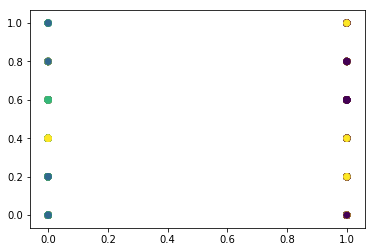

In [47]:
'''
L’algorithme de mixture de gaussienne.
'''
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4).fit(dataset_df)
labels = gmm.predict(dataset_df)
print(labels)


In [56]:
'''
1-plus-proche voisin

'''

count_col = dataset_df.shape[0] 
everage_math = dataset_df[3].mean(axis=0)
list_bool = list(range(count_col))
for i in range(1,count_col):
    if dataset_df[3].iloc[i] > everage_math :
        list_bool[i] = 1
    else:
        list_bool[i] = 0
s = pd.Series(list_bool)
dataset_df['supérieur_moyen'] = s

def dist(x, y):
    dist = np.linalg.norm(x - y)
    return dist


df_np = dataset_df.values
split= 4*len(df_np)//5
list_class = []
num_juste = 0
for i in range (split, len(df_np)-1):
    dist_min = dist(df_np[i],df_np[0])
    voisin = 0
    for j in range (1, split-1):
        if dist(df_np[i],df_np[j]) < dist_min:
            dist_min = dist(df_np[i],df_np[j])
            voisin = j
    if df_np[voisin][6] == df_np[i][6]:
        num_juste += 1
    list_class.append(df_np[voisin][6])    
#print(list_class)
print("rate de juste",num_juste/split)



rate de juste 0.0275


In [57]:
"""
BAYES
"""
dataset = pd.read_csv( "StudentsPerformance.csv")
dataset['supérieur_moyen'] = s
length_data = dataset.shape[0]
# return p(x)
def p_x(colonne,v):
    num=0
    len_colonne = len(colonne.values)
    for i in range(1,len_colonne):
        if colonne.iloc[i] == v:
            num +=1            
    return num/length_data


#return p(x|y)
def p_xy(col,x,y):
    ini = 0
    for index, row in dataset.iterrows():
        if row[col]== x and row['supérieur_moyen'] == 1:
            ini += 1
    return ini/length_data
        
"""

"""
def BAYES(x1,x2,x3,x4,x5):
    p_x1 = p_x(dataset['gender'],x1)
    p_x2 = p_x(dataset['race/ethnicity'], x2)
    p_x3 = p_x(dataset['parental level of education'],x3)
    p_x4 = p_x(dataset['lunch'],x4) 
    p_x5 = p_x(dataset['test preparation course'],x5)
    p_X = p_x1*p_x2*p_x3*p_x4*p_x5
    print('p_X : ',p_X)
    p_Y = dataset[dataset.supérieur_moyen==1].shape[0]/length_data
    print('p_Y : ',p_Y)
    #f(X1,X2,X3,X4,X5|Y=1)
    p_XY = p_xy('gender','female',1)*p_xy('race/ethnicity','group A',1)*p_xy('parental level of education',"bachelor's degree",1)*p_xy('lunch','standard',1)*p_xy('test preparation course','none',1)
    print('p_XY : ',p_XY)
    #f(y=1|X1,X2,X3,X4,X5)
    p_res = p_XY*p_Y/p_X
    return p_res

'''
TEST
'''

x1='female'
x2='group A'
x3="bachelor's degree"
x4="standard"
x5='none'
print("The result of f(y=1|X1=female,X2=group A,X3=bachelor's,X4=standard,X5=none) is : ", BAYES(x1,x2,x3,x4,x5))


    

p_X :  0.002222339002884
p_Y :  0.358
p_XY :  0.0
The result of f(y=1|X1=female,X2=group A,X3=bachelor's,X4=standard,X5=none) is :  0.0


In [19]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,supérieur_moyen
0,female,group B,bachelor's degree,standard,none,72,72,74,0
1,female,group C,some college,standard,completed,69,90,88,1
2,female,group B,master's degree,standard,none,90,95,93,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,0
4,male,group C,some college,standard,none,76,78,75,1


In [59]:
"""
gaussian naive bayes

"""

import collections 
import numpy as np
from math import *


#méthode pour calculer probabilité antérieure P(y)
def pre_prob(y):
    y_dict = collections.Counter(y)
    pre_probab = np.ones(2)
    for i in range(0, 2):
        pre_probab[i] = y_dict[i]/y.shape[0]
    return pre_probab

'''
retourner le mean et variance P(y|X)
'''
def mean_var(X, y):
    n_features = X.shape[1]
    m = np.ones((2, n_features))
    v = np.ones((2, n_features))
    n_0 = np.bincount(y)[np.nonzero(np.bincount(y))[0]][0]
    x0 = np.ones((n_0, n_features))
    x1 = np.ones((X.shape[0] - n_0, n_features))
    
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 0:
            x0[k] = X[i]
            k = k + 1
    k = 0
    for i in range(0, X.shape[0]):
        if y[i] == 1:
            x1[k] = X[i]
            k = k + 1
        
    for j in range(0, n_features):
        m[0][j] = np.mean(x0.T[j])
        v[0][j] = np.var(x0.T[j])*(n_0/(n_0 - 1))
        m[1][j] = np.mean(x1.T[j])
        v[1][j] = np.var(x1.T[j])*((X.shape[0]-n_0)/((X.shape[0]
                                                      - n_0) - 1))
    return m, v # mean et variance 

'''
retourner la probabilité postérieure P(X|Y) avec les parametres mean, variance, et X. 
'''

def prob_feature_class(m, v, x):
    n_features = m.shape[1]
    pfc = np.ones(2)
    for i in range(0, 2):
        product = 1
        for j in range(0, n_features):
            product = product * (1/sqrt(2*3.14*v[i][j])) * exp(-0.5
                                 * pow((x[j] - m[i][j]),2)/v[i][j])
        pfc[i] = product
    return pfc

'''
Fonction Gaussian naive bayes qui a trois paramètres, X_train, Y_train, et x. 
Il retourne mean, variance, probalilité antérieure et postérieure, probabilité conditionnelle et resultat de prédiction
'''
def GNB(X, y, x):
    m, v = mean_var(X, y)
    pfc = prob_feature_class(m, v, x)
    pre_probab = pre_prob(y)
    pcf = np.ones(2)
    total_prob = 0
    for i in range(0, 2):
        total_prob = total_prob + (pfc[i] * pre_probab[i])
    for i in range(0, 2):
        pcf[i] = (pfc[i] * pre_probab[i])/total_prob
    prediction = int(pcf.argmax())
    return m, v, pre_probab, pfc, pcf, prediction

# transformer donnée pandas en donnée numpy 
X_train = np.array(dataset.iloc[:,[5,6,7]])
y_train = np.array(dataset['supérieur_moyen'])


'''
Test
'''
# donée pour tester
x = np.array([80, 90, 100]) 
# executer Gaussian Naive Bayes pour donnée test
m, v, pre_probab, pfc, pcf, prediction = GNB(X_train, y_train, x)

print(m) # mean 
print(v) # variance 
print(pre_probab) # probabilité antérieure 
print(pfc) # probabilité postérieure
print(pcf) # probabilité conditionnelle 
print(prediction) # prédiction

[[64.07788162 66.53426791 64.5046729 ]
 [69.69553073 73.89385475 74.41899441]]
[[230.80827756 209.20397208 224.98983772]
 [208.64933571 186.00550835 178.89958218]]
[0.642 0.358]
[1.81556195e-07 1.49501923e-06]
[0.17883304 0.82116696]
1


In [61]:
'''
la régression logistique
'''

from sklearn import linear_model, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = np.array(dataset.iloc[:,[5,6,7]])
Y = np.array(dataset['supérieur_moyen'])

# 70% de données pour entrainement, 30% pour tester
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

# normaliser les données
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# entrainer la modele
logreg = linear_model.LogisticRegression(C=1e5)
logreg.fit(X_train, Y_train)

# prédire
prepro = logreg.predict_proba(X_test_std)
acc = logreg.score(X_test_std,Y_test)
print("Accuracy:",acc)

Accuracy: 0.6666666666666666


/Users/utilisateur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/utilisateur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/utilisateur/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/utilisateur/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
